   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  
        

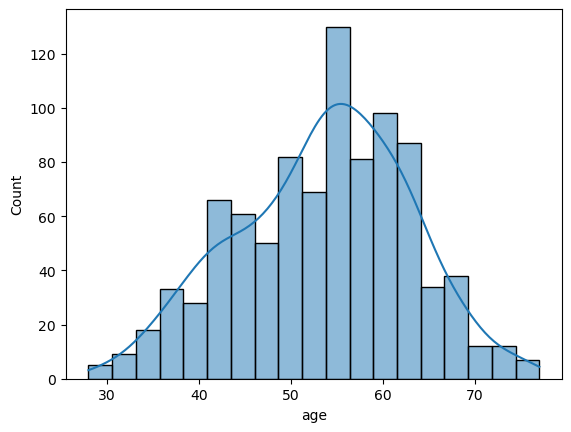

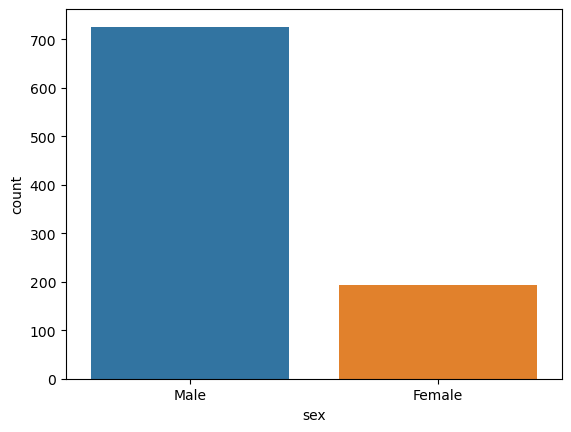

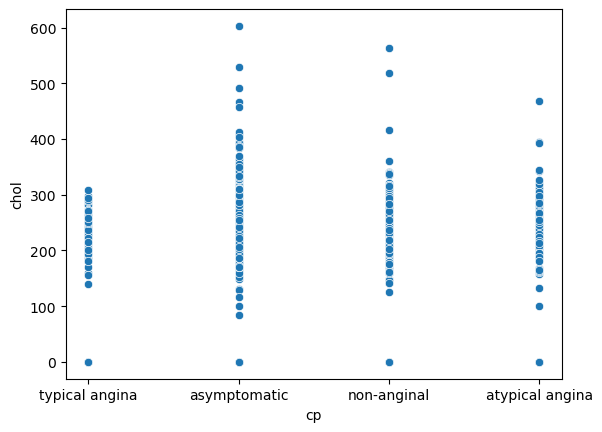

In [146]:
#1️⃣ 𝗕𝘂𝗶𝗹𝗱 𝘁𝗵𝗲 𝗳𝗲𝗮𝘁𝘂𝗿𝗲 𝗽𝗶𝗽𝗲𝗹𝗶𝗻𝗲
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
#--------------------------------------------------------------
#Dataset utilizado: Heart Disease UCI - Kaggle
#Análisis exploratorio de datos (histogramas, correlaciones, outliers, valores faltantes, tipos de datos, etc).
#--------------------------------------------------------------
#Cargar el Dataset
df = pd.read_csv('heart_disease_uci.csv')

#Visualización de las Primeras Filas del Dataset
print(df.head())

#Resumen Estadístico del Dataset
print(df.describe())

#Verificación de Valores Nulos
print(df.isnull().sum())

#Visualización de Distribuciones
sns.histplot(df['age'], kde=True)
plt.show()

#Gráficos de Barras para Datos Categórico
sns.countplot(x='sex', data=df)
plt.show()

#Diagramas de Dispersión para Relaciones entre Variables
sns.scatterplot(x='cp', y='chol', data=df)
plt.show()


In [180]:
#--------------------------------------------------------------
#Ingeniería / selección de características + limpieza de datos
#--------------------------------------------------------------
#Cargar el Dataset
df = pd.read_csv('heart_disease_uci.csv')

#Limpieza--->
# Eliminar columnas con muchos valores faltantes
df.dropna(axis=1, thresh=int(0.8*len(df)), inplace=True)

# Rellenar valores faltantes con la mediana o la moda
imputer = SimpleImputer(strategy='median')
df['age'] = imputer.fit_transform(df[['age']])

imputer = SimpleImputer(strategy='most_frequent')
df['age'] = imputer.fit_transform(df[['age']])

# Eliminar outliers en 'ingreso'
df = df[df['age'] < df['age'].quantile(0.95)]

#Ingeniería de Características--->
# Estandarizar 'edad' e 'ingreso'
scaler = StandardScaler()
df[['age', 'chol']] = scaler.fit_transform(df[['age', 'chol']])

# Convertir variables categóricas en dummies
df = pd.get_dummies(df, columns=['age', 'chol'])

# Crear una nueva característica, por ejemplo, rango de edad
df['rango_edad'] = pd.cut(df['thalch'], bins=[-2, -1, 0, 1, 2], labels=['joven', 'adulto joven', 'adulto', 'senior'])

#Selección de Características--->
# Eliminar características redundantes
df.drop(['rango_edad'], axis=1, inplace=True)

# Seleccionar características para el modelado (esto dependerá de tu objetivo)
features = df[['sex', 'sex']]

#Visualización de las Primeras Filas del Dataset
print(df.head())

   id     sex    dataset               cp  trestbps    fbs         restecg  \
0   1    Male  Cleveland   typical angina     145.0   True  lv hypertrophy   
1   2    Male  Cleveland     asymptomatic     160.0  False  lv hypertrophy   
2   3    Male  Cleveland     asymptomatic     120.0  False  lv hypertrophy   
3   4    Male  Cleveland      non-anginal     130.0  False          normal   
4   5  Female  Cleveland  atypical angina     130.0  False  lv hypertrophy   

   thalch  exang  oldpeak  ...  chol_1.9115048035395252  \
0   150.0  False      2.3  ...                    False   
1   108.0   True      1.5  ...                    False   
2   129.0   True      2.6  ...                    False   
3   187.0  False      3.5  ...                    False   
4   172.0  False      1.4  ...                    False   

   chol_1.9566979899865125  chol_2.3272821188518087  chol_2.3995912171669884  \
0                    False                    False                    False   
1               

In [196]:
#2️⃣ 𝗕𝘂𝗶𝗹𝗱 𝘁𝗵𝗲 𝗺𝗼𝗱𝗲𝗹 𝘁𝗿𝗮𝗶𝗻𝗶𝗻𝗴 𝗽𝗶𝗽𝗲𝗹𝗶𝗻𝗲
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
#--------------------------------------------------------------
#Modelo de Deep learning - Convencional
#NOTA: AQUI UTILICE OTRO DATASET
#--------------------------------------------------------------
#Cargar el Dataset
df = pd.read_csv('heart_disease_uci.csv')

#Explorar y Preparar los Datos
# Ver las primeras filas del dataset
print(df.head())

# Verificar si hay valores faltantes
print(df.isnull().sum())

# Separar las características (X) y la etiqueta (y)
X = df.drop('trestbps', axis=1)
y = df['chol']

#Dividir el Dataset en Conjuntos de Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Entrenar el Modelo de Regresión Logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#Evaluar el Modelo
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  
id      

ValueError: could not convert string to float: 'Male'

In [198]:
#--------------------------------------------------------------
#Modelo de Deep learning - Deep learning
#--------------------------------------------------------------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Cargar y Preparar el Dataset
df = pd.read_csv('heart_disease_uci.csv')
X = df.drop('trestbps', axis=1)
y = df['chol']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Entrenar el Modelo y Evaluar
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

ValueError: could not convert string to float: 'Female'

In [212]:
#3️⃣ 𝗕𝘂𝗶𝗹𝗱 𝘁𝗵𝗲 𝗯𝗮𝘁𝗰𝗵-𝗽𝗿𝗲𝗱𝗶𝗰𝘁𝗶𝗼𝗻 𝗽𝗶𝗽𝗲𝗹𝗶𝗻𝗲
#--------------------------------------------------------------
#Modelo de Deep learning - Deep learning
#--------------------------------------------------------------
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#Cargar el Dataset
df = pd.read_csv('heart_disease_uci.csv')
X = df.drop('sex', axis=1)
y = df['age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Definir el Modelo y los Parámetros para la Búsqueda en Cuadrícula
model = RandomForestClassifier(random_state=42)
parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

#Aplicar la Búsqueda en Cuadrícula con Validación Cruzada
grid_search = GridSearchCV(model, parameters, cv=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

#Mostrar los Mejores Parámetros y Evaluación
print("Mejores Parámetros:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


InvalidParameterError: The 'cv' parameter of GridSearchCV must be an int in the range [2, inf), an object implementing 'split' and 'get_n_splits', an iterable or None. Got 1 instead.